# Saudi Arabia Used Cars

**[Source : Saudi Arabia Used Cars](https://drive.google.com/file/d/1Tr4YT5dmgwTrXLvIqZ4diBf5z8K6JjrR/view)*

### **Contents**

1. Business Problem
2. Data Understanding
3. Data Cleaning
4. Data Analysis
5. Feature Engineering
6. Modeling
7. Conclusion
8. Recommendation

****

## 1. Business Problem

In this step, we get challenges and issues faced by a business. These may prevent a business from executing strategy and achieving goals. In some cases, business problems also threaten the long term survival of a firm.

### Context
Saudi Arabia is the Middle East’s largest country. Based on the statistics in 2018 around 12.6 million expats lived there, comprising 37.7% of the total population (around 33 million). As many expats that working in Saudi Arabia, there is many factory from another country. For example is a car factory.

A car factory is really high-good demand in Saudi Arabia. This caused by the price of fuel itself. The fuel in Saudi Arabia is the one of the nice-lower price on the world. Back on this car factory demand, there is many Used Car Factory / Website that selling the second-use Car. The problem is, there is so many type the car (based on; brand, gear type, engine size, mileage, options and year) so it's really challenging for selling itself to predicting the price of the used cars.

The used car market is a fair weather thing. It fluctuates based on any number of factors whether real (or in some cases imagined) just like any other market. After a booming market, it seems that used car prices may start to dip soon. So, the poblem is how to get the best price to sell or to buy so we don't get the wrong made decision. Based on that, we might have to predicted the Price of used cars on the dataset that contains features(variables) on it.

### Problem Statement

In this issue, the biggest problem from the marketplace is how to sell the used-cars on Saudi Arabia so they are not selling it overprice and underprice. Overprice will made costumers not interested to buy the car, underprice will made loss-profit on their business.

Marketplace definitely wants a big profit by selling the price of used cars on the persist price based on the type, mileage, options etc. How to made a competitive price is the one of the problem to made a big profit on their business.

### Goals

Based on the problem statement above, marketplace definitely need have a tool that can predicted the `Price` of used cars to determine the best price of selling the used-cars. This should be difficult to stakeholders/marketplace to made a decision byself because there are to many kind, variety of car, type of car etc. By this Prediction, would might be helper/tool for the marketplace/stakeholder to made a decision.

### Analytic Approach

By this issue, we will analyze the data to be able to find the patterns of existing features which differentiate one car to other.

In the next, we will made a regression model to help the marketplace as a tool for made a better and best decision on a predicted the price of used cars. Surely we want to made a good model to helped the marketplace and statisfied the costumers to buy on their channel.

### Evaluation Metric

Evaluation metric that will be used in this model are MSE (Mean Squared Error), RMSE (Root of Mean Squared Error) cause (the value is usually interpreted as either how far (on average) the residuals are from zero or as the average distance between the observed values and the model predictions) and R-squared (persentage) as a value of the prediction model.

****

## 2. Data Understanding

In this step, we will understanding the data such as; read the dataset, giving the descripton of variable (attributes of the data) due to seek the better understand data assets and manage accordingly.

In [533]:
# Import library for exploring dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignores the warnings
import warnings
warnings.filterwarnings('ignore')


# To change Scientific Notation to Decimal Format
pd.options.display.float_format = '{:.1f}'.format

### Read the dataset

In [534]:
# Read the dataset
df = pd.read_csv('data_saudi_used_cars.csv')

In [535]:
# Check data-type for each variable & anomalies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


### Variable Description

- `Type` : The type of used car

- `Region` : The region of used car

- `Make` : The company name of used car

- `Gear_Type` : The gear type size of used car

- `Origin` : The origin of used car

- `Options` : The options of used car

- `Year` : The manufacturing year of used car

- `Engine_Size` : The engine size of used car

- `Mileage` : The mileage of used car

- `Negotiable` : The negotiable status of used car

- `Price` : The price of used car (Riyal)

**!!** `Price` column is our target because we want to predict it. While the other columns will be our predictor variables for predicting the `Price`

In [536]:
# View the first 5 rows of the data
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


As we can see that the `Price` column has some **0** value, which is impossible and we will fixing this later

### Exploratory Data Analysis

Exploratory data analysis is applied to investigate the data and summarize the key insights. It will give us the basic understanding of our data, it's distribution, null values and much more. So we do the Exploratory Data Analysis (EDA) to our data for better understanding.

As we mentioned before, the column `Price` is the target variable and rest of the columns are independent variables. The independent variables are again divided into Categorical and Numerical variabels.

Hereby we seperate each of type the variabel itself
- **Numerical Variabels** : Year, Engine_Size, Mileage, Price
- **Categorical Variabels** : Type, Region, Make, Gear_Type, Origin, Options, Negotiable

**Numerical Variabels**

For the Numerical Variabels, we can get the insight and correlation by Pair Plot. Because Pair Plot plotting all the pair of all the numerical variabels on the list so we can see the correlation each numerical variable.

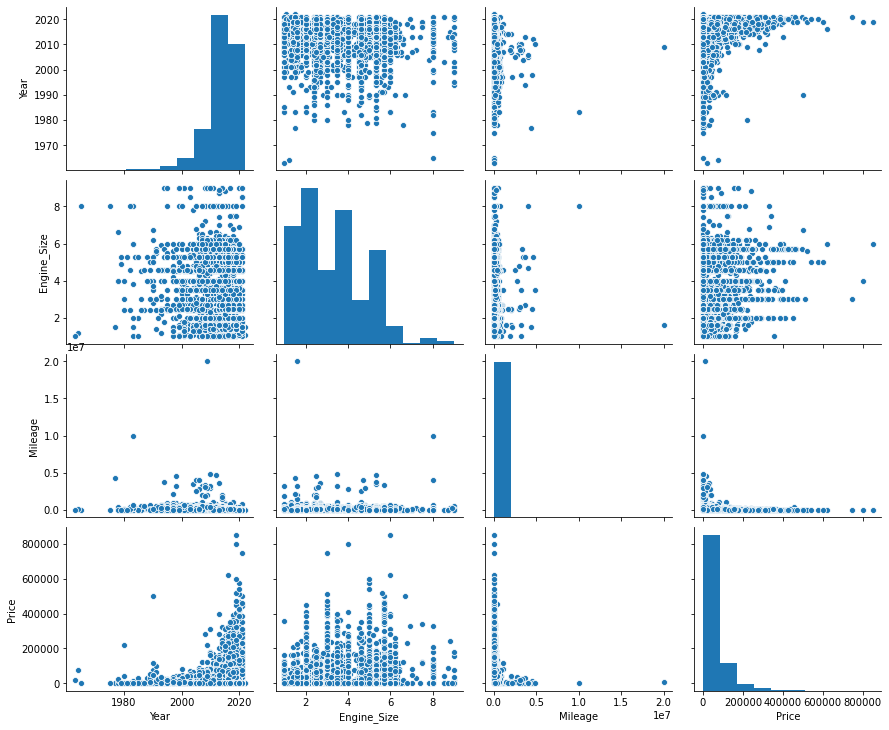

In [537]:
# Pairplot all the numerical variabel
sns.pairplot(df[['Year','Engine_Size','Mileage','Price']], aspect=1.2)

**Insight** : 

as we can see from the pairplot graph above, there is; high correlation & low correlation one to each other variabel
- **Year** : Engine_Size (Low Correlation), Mileage (High Correlation), Price (High Correlation)
- **Engine_Size** : Year (Low Correlation), Mileage (Low Correlation), Price (Low Correlation)
- **Mileage** : Year (High Correlation), Engine_Size (Low Correlation), Price (Low Correlation)
- **Price** : Year (High Correlation), Engine_Size (Low Correlation), Mileage (Low Correlation) 

**Categorical Variabels**

For the Categorical Variabels, we will analyze the value on each category for exploratoring and summarize the category itself. We will do a rank and counts on it, so we can see What is the most company of used cars, what is the most type of used cars, which region is the highest of using used cars, where are from the used cars origin etc.

**Top 10 Company of Used Cars & Top 10 Type of Used Cars**

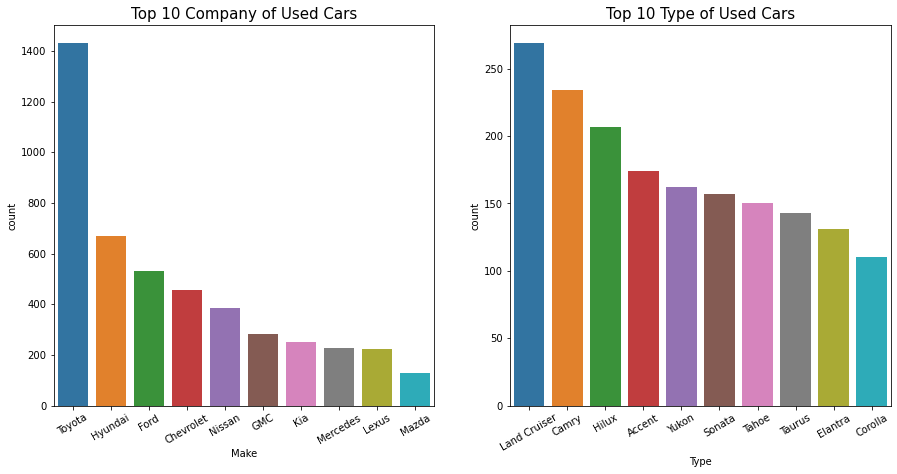

In [538]:
# Show the top 10 Company & Type of used cars
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Make'], order = df['Make'].value_counts().iloc[:10].index)
plt.title('Top 10 Company of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.subplot(1,2,2)
sns.countplot(x=df['Type'], order = df['Type'].value_counts().iloc[:10].index)
plt.title('Top 10 Type of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.show()

The graph above shows us that Toyota is the most produced of used cars than the other company. This is so related because in the Top 10 Type of Used Cars is filled with Toyota Type Cars (Land Cruiser, Campry, Hilux & Corolla). On the other hand, Hyundai made a secod most produced of used cars with their Accent, Sonata and Elantra. So, based on this graph we can see the correlation between **Categorical Variable**; Make and Type

**Top 10 Region of Used Cars & Origi of Used Cars**

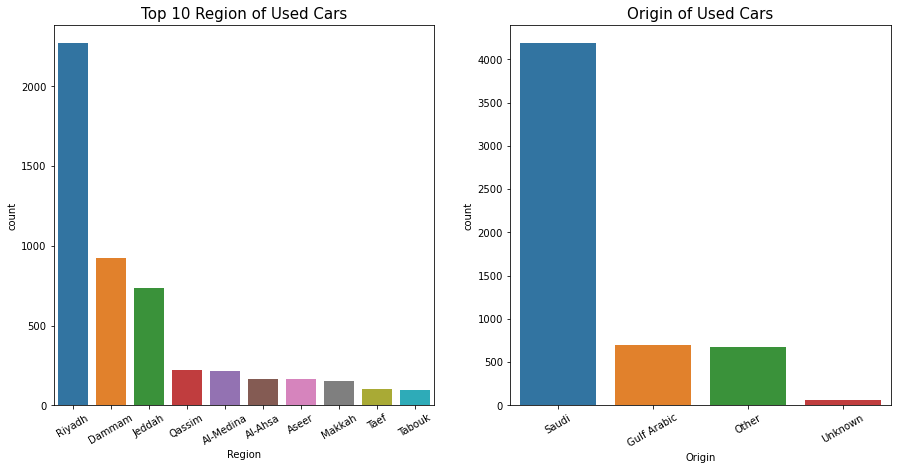

In [539]:
# Show the top 10 Company & Type of used cars
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Region'], order = df['Region'].value_counts().iloc[:10].index)
plt.title('Top 10 Region of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.subplot(1,2,2)
sns.countplot(x=df['Origin'], order = df['Origin'].value_counts().index)
plt.title('Origin of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.show()

As we can see that Riyadh is the most Region of used cars (more than 2000 cars) while Saudi is the most of Origin of used cars (more than 4000 cars). Seem this graph had a correlation each other. But let's we look at the other side. There are `Unknown` and `Other` variable on Origin graph. This will make our data becomes redundant and noisy. For this issue, we notes that the data on `Unknown` variable will we move on `Other` variable on the **Data Cleaning** step.

**Type & Amount of Gear Type, Options & Negotiable on Used Cars**

In [540]:
# Check type & amount of Gear Type, Options & Negotiable on Used Cars
print(f"Type & Amount of Gear Type on Used Cars :\n{df['Gear_Type'].value_counts()}")
print(f"\nType & Amount of Options on Used Cars :\n{df['Options'].value_counts()}")
print(f"\nType & Amount of Negotiable on Used Cars :\n{df['Negotiable'].value_counts()}")

Type & Amount of Gear Type on Used Cars :
Automatic    4875
Manual        749
Name: Gear_Type, dtype: int64

Type & Amount of Options on Used Cars :
Full         2233
Standard     1822
Semi Full    1569
Name: Options, dtype: int64

Type & Amount of Negotiable on Used Cars :
False    3828
True     1796
Name: Negotiable, dtype: int64


Based on the data above, we can tell that :
- The Used Cars is dominated by Automatic Gear Type
- There are three types of Options on Used Cars : Full (2233), Standard (1822) and Semi Full (1569)
- Many of the Used cars can't be negotiable

****

## 3 Data Cleaning

In this step, we will process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicated, or incompleted data within a dataset. Having clean data will ultimately increase overall productivity and allow for the highest quality information in your decision-making

### Check the detail of dataset

In [541]:
# Make the duplicate of the dataset
df_model = df.copy()

In [542]:
# Check the dataset info more detail
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[Sylvian Bus, Doblo]"
1,Region,object,0,0.0,27,"[Al-Namas, Riyadh]"
2,Make,object,0,0.0,58,"[Jaguar, Jeep]"
3,Gear_Type,object,0,0.0,2,"[Automatic, Manual]"
4,Origin,object,0,0.0,4,"[Gulf Arabic, Unknown]"
5,Options,object,0,0.0,3,"[Full, Standard]"
6,Year,int64,0,0.0,50,"[2015, 2001]"
7,Engine_Size,float64,0,0.0,71,"[1.9, 7.5]"
8,Mileage,int64,0,0.0,1716,"[181, 48000]"
9,Negotiable,bool,0,0.0,2,"[True, False]"


As we mentioned before that in the Origin variable, there is redundant data (Unknown & Other) because that mean the same each other on basic knowledge. So we will change (replace) the Unknown value to Other value cause it mean the same.

In [543]:
# Replace 'Unknown' to 'Other' on Origin variable
df_model['Origin'] = df_model['Origin'].replace('Unknown','Other')

In [544]:
df_model['Origin'].value_counts()

Saudi          4188
Other           739
Gulf Arabic     697
Name: Origin, dtype: int64

### Check for Missing Value and Duplicated Rows

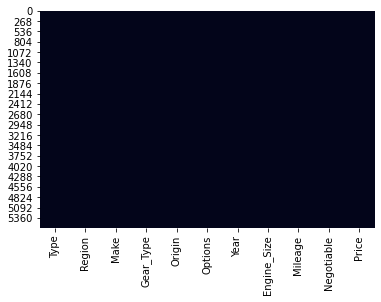

In [545]:
# Create missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

From the info of the dataset above, we can see that there is no missing value in our dataset. But we still must be observed in the term of deciding the best treatment for our model.

We also must checking for any duplicate data in our dataset. Duplication means that we have repated data in our dataset. This could be due to things like data entry errors or data collection methods. Removing duplication will lead us to make a best observation we have.

In [546]:
# Check for duplicated rows
print("Number of duplicate rows: ", sum(df_model.duplicated()))

Number of duplicate rows:  4


As we can see that there are 4 rows had been duplicated before. So we must delete (drop) the duplicated row for getting the clean data as we want.

In [547]:
# Drop duplicated rows
df_model.drop_duplicates(inplace=True)
print("Number of duplicate rows: ", sum(df_model.duplicated()))

Number of duplicate rows:  0


After we dropped the duplicated row, we must considering for doing dropped the column that we think will not use in the future. The row that we dropped is the row that had no no-big relevation to other column or our to model.
- Based on domain knowledge, column `Negotiable` has no big relevation to other column. So that, we will dropped the column `Negotiable` first
- We also limiting the extreme value of variable which that may effects to our model further **based on knowledge*

### Delete unnecassarry column

On this step, we will delete unnecassary column that we think it's not truely effect to our dataset and this could be from our based knowledge. As far as we known, that `Negotiable` doesn't have too much effect to other variable (Type - Negotiable, Region - Negotiable, Year - Negotiable). Based on this issue we could delete(drop) the 'Negotiable' because this may could getting too much information (overfitting) to our model.

In [548]:
# Delete unnecasarry column (Negotiable) for analysis
df_model = df_model.drop(['Negotiable'], axis=1)
df_model.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,0


As mentioned before, `Price` column has some 0 value, which is impossible. For these anomaly, we will drop the `Price`'s row contains 0 value.

In [549]:
# Check rows with Price represented as'0'
print("Number of Price with 0 value : ",df_model[df_model['Price'] == 0]['Price'].count())

Number of Price with 0 value :  1796


Cause the Variable `Price` with 0 value is 1796 data (31,39% of the data), we must drop the `Price` variabel with 0 value cause this will be effect to our model in the next.

In [550]:
# Delete rows with Price represented as'0' and View another view the anomaly
df_model = df_model[df_model['Price'] != 0]
df_model.sort_values(by='Price', ascending=1, inplace=True)
df_model.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,1
3992,G80,Riyadh,Genesis,Automatic,Other,Semi Full,2018,3.8,170000,500
4399,Yaris,Riyadh,Toyota,Automatic,Saudi,Standard,2018,1.5,100000,850
5128,Rio,Arar,Kia,Automatic,Saudi,Standard,2019,1.4,55500,884
3474,Yaris,Najran,Toyota,Automatic,Saudi,Standard,2019,1.6,85000,950


From the table above, we can see that there is no more 0 value on `Price` column. But we can see that our data may have another anomaly. It is impossible for selling the Used Cars; **Yukon - Auto - 2019 - 5.3 - 50000 miles** for 1 dollar. For this Anomaly, we will cut the extreme values that are outside the range of what is expected and unlike the another data.
We will desciribing & ploting the `Price` column on dataset, so we can see the resume.

According my reaserch to www.edmunds.com said that every car has mileage milestones. In brief, one of the most main factors affecting a used vehicle's price is `Mileage`. Based on that fact we can say the `Mileage` is really affects the Price of Used Cars. Above of all, we will see the outliers from each numerical variabel so we can decided what is we will do on the next step.

In [551]:
# Recheck the dataset info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3824 entries, 3131 to 3513
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3824 non-null   object 
 1   Region       3824 non-null   object 
 2   Make         3824 non-null   object 
 3   Gear_Type    3824 non-null   object 
 4   Origin       3824 non-null   object 
 5   Options      3824 non-null   object 
 6   Year         3824 non-null   int64  
 7   Engine_Size  3824 non-null   float64
 8   Mileage      3824 non-null   int64  
 9   Price        3824 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 328.6+ KB


### Find the outliers

Before we're cutting the data, we will find the outliers first. Outliers truely have impact to our dataset. It will increase the error variance and reduces the power of statistical tests. It can cause bias and/or influence estimates. It can also impact the basic assumption of regression as well as other statistical models.

But the challenges are; how we can detect the outliers? is there positive outliers and negative outliers on our dataset? how we cut the outliers & cleaning ourdataset without making our data is missing many information. This will be discussed on our project below.

Here we will see the distribution plot for each numerical variabel of dataset before we decided which row and column that we want to cut that might contains outliers.

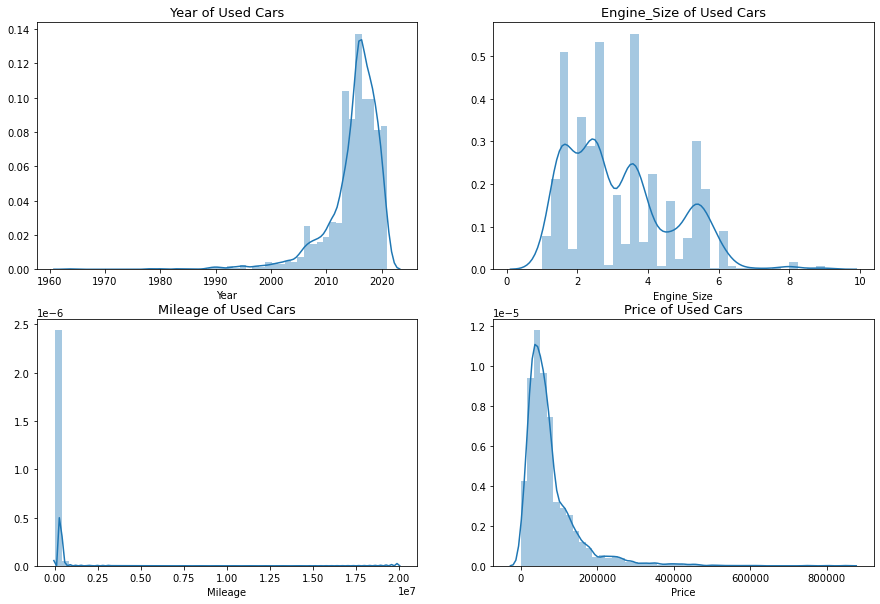

In [552]:
# Show distribution plot for each numerical variabel on dataset
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.distplot(df_model['Year'])
plt.title('Year of Used Cars',fontsize=13)

plt.subplot(222)
sns.distplot(df_model['Engine_Size'])
plt.title('Engine_Size of Used Cars',fontsize=13)

plt.subplot(223)
sns.distplot(df_model['Mileage'])
plt.title('Mileage of Used Cars',fontsize=13)

plt.subplot(224)
sns.distplot(df_model['Price'])
plt.title('Price of Used Cars',fontsize=13)

plt.show()

In [553]:
# Additional information for the graph
from scipy.stats import skew
from scipy.stats import kurtosis

print("Year Skew :",skew(df_model["Year"]), ", Year Kurtosis :",kurtosis(df_model["Year"]))
print("Engine_Size Skew :",skew(df_model["Engine_Size"]), ", Engine_Size Kurtosis :",kurtosis(df_model["Engine_Size"]))
print("Mileage Skew :",skew(df_model["Mileage"]), ", Mileage Kurtosis :",kurtosis(df_model["Mileage"]))
print("Price Skew :",skew(df_model["Price"]), ", Price Kurtosis :",kurtosis(df_model["Price"]))

Year Skew : -2.645640967990875 , Year Kurtosis : 12.440303365812376
Engine_Size Skew : 0.7170561392706625 , Engine_Size Kurtosis : -0.059362333134416634
Mileage Skew : 39.422345261243805 , Mileage Kurtosis : 1995.333501937911
Price Skew : 3.096416044314816 , Price Kurtosis : 15.590055086179994


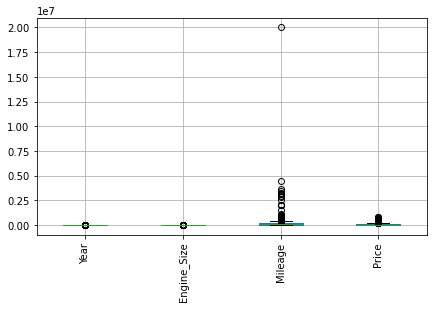

In [554]:
# Check the outliers for numerical variabel
plt.figure(figsize=(7, 4))
df_model.boxplot(rot=90);

As we know and can see, `Mileage` and `Price` variable has an outlier. There is an exteremely value on `Mileage`, and the `Price` is unlikely possible to have sell used cars just for 1 dollar. This outlier will impacts to our analysis and data model. We will treatment this outlier for the best model we get.

First, we will describe the numerical variabel to see the descriptive of each numerical data to percentiles so we can decided the treatment of these outliers. **We will count the 5 min-max percentiles each numerical variable to see the variety of data itself.*

In [555]:
### Decribe the model percentiles
df_model.describe(percentiles = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1])

,Year,Engine_Size,Mileage,Price
count,3824.0,3824.0,3824.0,3824.0
mean,2014.9,3.2,142621.1,78019.2
std,5.1,1.5,378394.2,72748.2
min,1963.0,1.0,100.0,1.0
5%,2006.0,1.4,276.0,14000.0
10%,2009.0,1.5,4895.1,21000.0
20%,2013.0,1.8,33000.0,30000.0
30%,2014.0,2.2,61000.0,40000.0
40%,2015.0,2.5,83000.0,48600.0
50%,2016.0,2.7,103000.0,58000.0


After we see the describe and the percentiles of each numerical variable we should create the boxplot and describe the outliers based on boxplot result of each numerical variable, so we can see the outliers percisely on each of them.

**- Year**

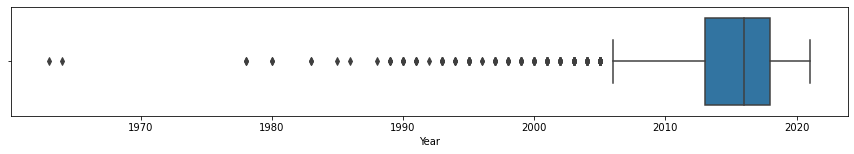

In [556]:
# Check the 'Year' outliers with boxplot
plt.figure(figsize=(15,2))
sns.boxplot(x=df_model["Year"])

In [557]:
# Sort the min 7 data of Year
df_model.sort_values(by='Year', ascending=1, inplace=True)
df_model.head(7)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
5012,Other,Riyadh,Ford,Manual,Saudi,Standard,1963,1.0,300,22000
2262,Impala,Al-Ahsa,Chevrolet,Automatic,Other,Full,1964,1.2,100000,75000
3082,Land Cruiser 70,Riyadh,Toyota,Manual,Saudi,Standard,1978,4.0,400000,18000
3238,Patrol,Abha,Nissan,Manual,Saudi,Standard,1978,4.0,30000,28000
663,Other,Qassim,Other,Manual,Other,Standard,1980,2.4,2500,220000
4259,S,Riyadh,Mercedes,Automatic,Other,Standard,1980,3.0,160000,40000
3129,Land Cruiser 70,Dammam,Toyota,Manual,Saudi,Standard,1983,3.8,300000,14000


In [558]:
print("Count of data Year less than 10% percentile :",((df_model[df_model['Year'] < 2009].count()['Year'])/3824)*100,"%")

Count of data Year less than 10% percentile : 9.492677824267783 %


As we can see: 
- From the boxplot, the outliers is on the left **- so we sort & desc the min data of Year**
- We can see that the outliers is on 1963 & 1964. But we must had consideration with that year and with other variables on that data (Mileage, Type, Make, Geartype & Options) it's might be possible to sell the car with that price **- Acceptable**
- No lap/gap to far away between the 7 Min value of Year to other. There is a much of variation value under the mean (2014 - 2015) **- Acceptable**
- Min val have near of 10% data range of dataset **- Good Variety**

We still keep the raw data of Year Variabel to keep our accuration model. So we dont do the cut on the Year variabel. **Besides, the Skewness is near zero*

**- Engine_Size**

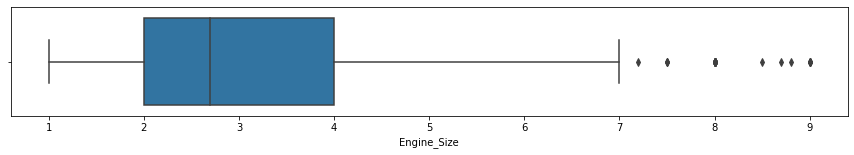

In [559]:
# Check the 'Engine_Size' outliers with boxplot
plt.figure(figsize=(15,2))
sns.boxplot(x=df_model["Engine_Size"])

In [560]:
# Sort the max 7 data of Engine_Size
df_model.sort_values(by='Engine_Size', ascending=0, inplace=True)
df_model.head(7)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1547,Marquis,Riyadh,Ford,Automatic,Other,Full,2008,9.0,115,17000
2217,Camry,Jeddah,Toyota,Automatic,Saudi,Semi Full,2014,9.0,106000,36000
650,E,Jeddah,Mercedes,Manual,Other,Semi Full,2017,9.0,134000,155000
3525,FJ,Hail,Toyota,Automatic,Saudi,Full,2014,9.0,308000,75000
5251,Sierra,Dammam,GMC,Automatic,Saudi,Full,2021,9.0,100,178000
59,Camry,Taef,Toyota,Automatic,Saudi,Semi Full,2001,9.0,150000,15000
600,G,Riyadh,Mercedes,Automatic,Saudi,Full,2015,8.8,213000,240000


In [561]:
print("Count of data Engine_Size more than 90% percentile :",((df_model[df_model['Engine_Size'] > 5.3].count()['Engine_Size'])/3824)*100,"%")

Count of data Engine_Size more than 90% percentile : 9.597280334728033 %


As we can see: 
- From the boxplot, the outliers is on the right **- so we sort & desc the max data of Engine_Size**
- We can see the outliers is on 7 to 9 0f Engine_Data. But as we know if it's possible to had car on that val of engine with that price. (Considering other variables on that data). **- Acceptable**
- No lap/gap on the 7 Max value of Engine_Size **- Acceptable**
- Max Val have near of 10% data range of dataset **- Good Variety**

We still keep the raw data of Engine_Size Variabel to keep our accuration model. So we dont do the cut on the Engine_Size variabel. . **Besides, the Skewness is near zero*

**- Mileage**

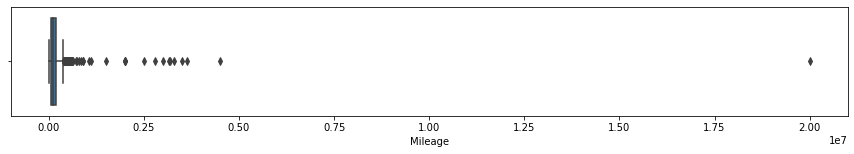

In [562]:
# Check the 'Mileage' outliers with boxplot
plt.figure(figsize=(15,2))
sns.boxplot(x=df_model["Mileage"])

In [563]:
# Sort the max 7 data of Mileage
df_model.sort_values(by='Mileage', ascending=0, inplace=True)
df_model.head(7)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3403,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,9000
572,Camry,Yanbu,Toyota,Automatic,Other,Full,1998,2.5,4500000,15000
4193,Innova,Riyadh,Toyota,Manual,Saudi,Standard,2013,2.7,3640000,30000
1412,Trailblazer,Jeddah,Chevrolet,Automatic,Other,Full,2004,5.3,3500000,10000
4548,Tahoe,Riyadh,Chevrolet,Automatic,Saudi,Semi Full,2008,5.7,3300000,27000
915,Pathfinder,Riyadh,Nissan,Automatic,Saudi,Standard,1998,3.5,3180003,10500
4875,Pathfinder,Riyadh,Nissan,Automatic,Saudi,Full,2008,2.6,3150000,20000


In [564]:
print("Count of data Mileage more than 90% percentile :",((df_model[df_model['Mileage'] > 284000.0].count()['Mileage'])/3824)*100,"%")

Count of data Mileage more than 90% percentile : 9.989539748953975 %


As we can see: 
- From the boxplot above, the outliers is on the right **- so we sort & desc the max data of Mileage** 
- We can see the outliers (extreme value) is on 2.00 le7 with Engine_Size 1.6 and Price 9000. We assume that it must be outliers that can be by human error or something. Because the gap between 20000000 to 4500000 it's to far **- Not Acceptable**
- Max Val have near of 10% data range of dataset **- Good Variety**

So we do the cut on the Mileage more than 4500000. **Besides, the Skewness really far from zero (39.422345261243805)*

**- Price**

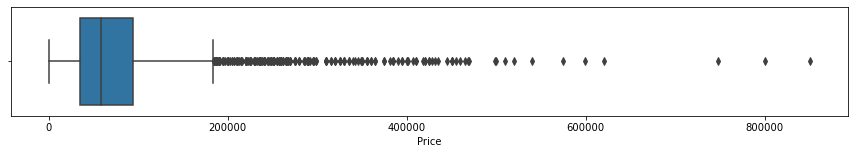

In [565]:
# Check the 'Price' outliers with boxplot
plt.figure(figsize=(15,2))
sns.boxplot(x=df_model["Price"])

In [566]:
# Sort the max 7 data of Mileage
df_model.sort_values(by='Price', ascending=0, inplace=True)
df_model.head(7)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,850000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,620000
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,599000
3561,Range Rover,Riyadh,Land Rover,Automatic,Saudi,Full,2020,5.0,26000,575000
3105,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2020,5.0,36000,540000


In [567]:
print("Count of data Price more than 90% percentile :",((df_model[df_model['Price'] > 153350].count()['Price'])/3824)*100,"%")

Count of data Price more than 90% percentile : 10.015690376569038 %


As we can see: 
- From the boxplot above, the outliers is on the right **- so we sort & desc the max data of Price**
- There is a lap/gap on the 7 Min value of Price on 1 to 500. *Based on knowladge, it's impossible to sell the 2019 used car for 1 dollar. and we can see that the other min price is seemly possible to selling on that variation of the value based on other variabel of the dataset* **- Not Acceptable**
- No lap/gap on the 7 Max value of Price **- Acceptable**
- Both Min and Max Val have near of 10% data range of dataset **- Good Variety**

Based on [research](https://ksa.yallamotor.com/used-cars/pr_1000_10000?page=2&sort=updated_desc), it's seems not realistic to sell an used cars less that 1000 Riyal

So we do the cut on the Price less than 1000. **Besides, the Skewness slihghtly far from zero (3.096416044314816)*

**Based on Research and Knowledge**

After we see which outliers that we decided to dropped in our dataset, we also have to check the info from the web (market place) so we can see/know what range is possible and impossible to sell car (based on Price, Mileage, Year Range etc). This research and knowledge will lead us to a better precision in a real life.

**[Source 1](https://ksa.yallamotor.com/used-cars/search)**
**[Source 2](http://p3nlhclust404.shr.prod.phx3.secureserver.net/SharedContent/redirect_0.html)**
**[Source 3](http://www.saudisale.com/SS_e_mpg.aspx)**

| **Variable** | **Range** |
| --- | --- |
| Price | > = 5000 |
| Mileage | < = 700000

### Drop the Outliers

For our summaries, we already adjust our decision and research to get the conclusion from our analysis for outliers :
- Drop the Mileage more than and equal to 700000
- Drop the Price less than and equal to 5000

In [568]:
# Drop the Outliers
df_model = df_model[(df_model['Price'] >= 5000)]
df_model = df_model[(df_model['Mileage'] <= 700000)]
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3734 entries, 3513 to 693
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3734 non-null   object 
 1   Region       3734 non-null   object 
 2   Make         3734 non-null   object 
 3   Gear_Type    3734 non-null   object 
 4   Origin       3734 non-null   object 
 5   Options      3734 non-null   object 
 6   Year         3734 non-null   int64  
 7   Engine_Size  3734 non-null   float64
 8   Mileage      3734 non-null   int64  
 9   Price        3734 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 320.9+ KB


We see that there are just 3734 datas are standing on our dataset (66.39%). We assume that this is a clean data so we can process our dataset on the next step (modeling).

In [569]:
# Check Clean dataset
df_model.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,850000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,800000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,748000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,620000
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,599000


****

## 4. Data Analysis

In this step, we will showing the graph to seeking the information either for the numerical variabel and categorical variabel. By seeking the information, we can analysed and decided what model we want to use. Having a good information and analysis brings us to the better decision making on the next stage

### Show the distribution data of each numerical variabel

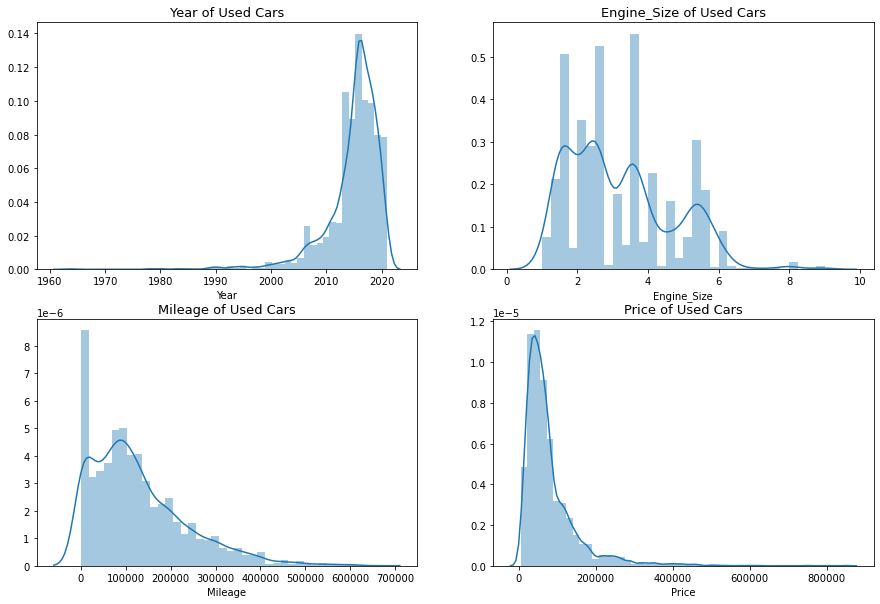

In [570]:
# Show distribution plot for each numerical variabel on dataset
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.distplot(df_model['Year'], kde=True)
plt.title('Year of Used Cars',fontsize=13)

plt.subplot(222)
sns.distplot(df_model['Engine_Size'], kde=True)
plt.title('Engine_Size of Used Cars',fontsize=13)

plt.subplot(223)
sns.distplot(df_model['Mileage'], kde=True)
plt.title('Mileage of Used Cars',fontsize=13)

plt.subplot(224)
sns.distplot(df_model['Price'], kde=True)
plt.title('Price of Used Cars',fontsize=13)

plt.show()

Based on Distribution plot above, we can see that our model had a variety of Skewness. Skewness tell us that the data might had an outlier (good/bad). After we analyze it we can see that there is a change on `Mileage`'s graph-clean dataset. On The `Mileage`'s graph the Skewness and Kurtosis are not extreme anymore. And we can see we had a rich data because there's much of variety on our clean dataset.

**View all categorical variables**

In [573]:
# View all categorical variables

categorical_columns = df_model.select_dtypes(include=['object'])
categorical_columns.head()

,Type,Region,Make,Gear_Type,Origin,Options
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full
4684,G,Riyadh,Mercedes,Automatic,Other,Full
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full


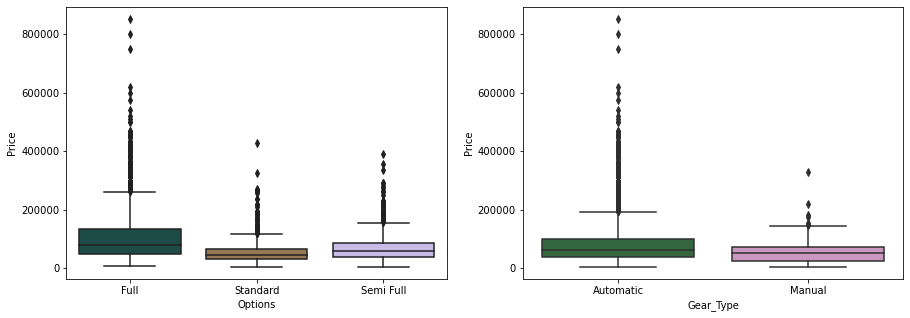

In [587]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=df_model.Options, y=df_model.Price, palette=("cubehelix"))

plt.subplot(1,2,2)
sns.boxplot(x=df_model.Gear_Type, y=df_model.Price, palette=("cubehelix"))

Insights :
- Full Options has higher spread out in price compared to the other
- Automatic Gear_Type has higher spread out in price compared to the other

<Figure size 1080x504 with 0 Axes>

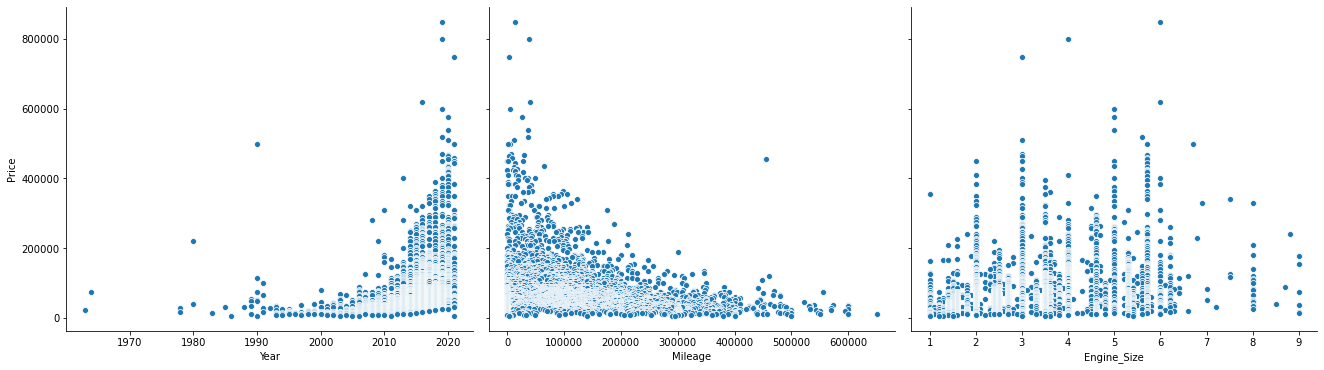

In [588]:
plt.figure(figsize=(15, 7))
sns.pairplot(df_model, x_vars=['Year', 'Mileage', 'Engine_Size'], y_vars='Price',size=5, aspect=1.2, kind='scatter')
plt.show()

Insights :
- Year of manufacting seems to have a positive correlation with price, which is expected
- Mileage appears to have a negative correlation with price
- Engine_Size have a week correlation with the price

**Data Correlation**

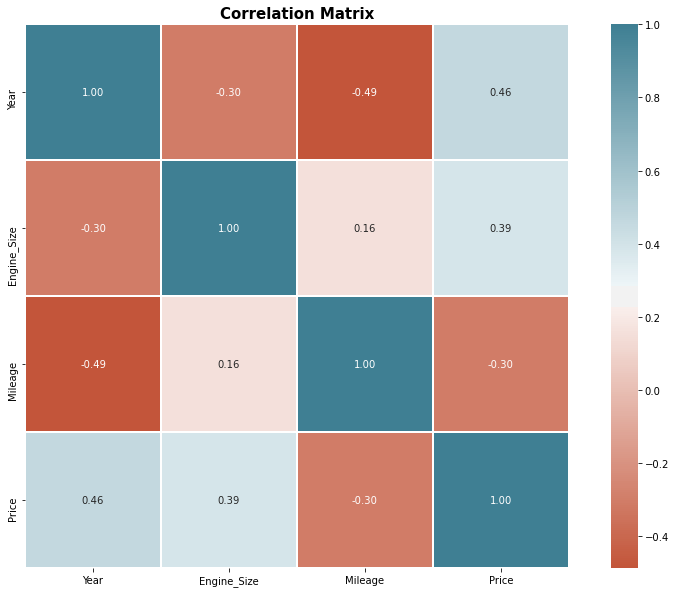

In [589]:
# Correlation matrix
plt.figure(figsize=(15, 10))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

As we can see in the Correlation Matrix, there is a high correlation between `Mileage` and `Year` this is because Mileage has it Year and will continue-up year by year. Also we can see that `Price` is more relies on `Year` and `Engine-Size`.

---

## 5. Feature Engineering

Feature engineering is a machine learning technique that leverages data to create new variables that aren't in the training set. It can produce new features or not, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [590]:
#Select the necessary data on dataset
df_fe = df_model[['Make','Year', 'Options','Engine_Size','Gear_Type', 'Mileage', 'Price']]

In [591]:
df_fe

,Make,Year,Options,Engine_Size,Gear_Type,Mileage,Price
3513,Bentley,2019,Full,6.0,Automatic,13000,850000
4684,Mercedes,2019,Full,4.0,Automatic,39000,800000
4273,Mercedes,2021,Full,3.0,Automatic,2500,748000
2120,Rolls-Royce,2016,Full,6.0,Automatic,40000,620000
4653,Land Rover,2019,Full,5.0,Automatic,4200,599000
...,...,...,...,...,...,...,...
62,Mercedes,1986,Full,3.0,Automatic,500000,5500
3052,Ford,2003,Semi Full,5.4,Automatic,400000,5000
3482,Chevrolet,2006,Standard,3.6,Automatic,380000,5000
2612,GMC,1990,Semi Full,3.5,Automatic,140000,5000


**Encoding**

Encoding is the process of putting a sequence of characters (letters, numbers, punctuation, and certain symbols) into a specialized format for processed / undertanding by other application. Since we're using categorical variable on our model, we must encode this categorical variable to numerical first so the function can processed our categorical variable.

In [592]:
df_fe.nunique()

Make             56
Year             41
Options           3
Engine_Size      65
Gear_Type         2
Mileage        1308
Price           403
dtype: int64

As a knowledge and based on correlation, we will encode (dummies) our categories data that have a correlation with car price such as Options, Gear_Type and Make. These features are based on our knowledge
- A price of car really depends on Options either it Full, Semi Full or standard
- Gear Type of car made a really impact on the price itself. Commonly, automatic car is more picey than manual type
- As we know, a price of car depends on it brand, cause we expected that a nice brand made a value on a price

Based on those reasons, we decided to made dummies on Options, Gear_Type and Make

In [372]:
# Dummies the variable that might have a best correlation
cat_col = ['Options', 'Gear_Type', 'Make']
dummies = pd.get_dummies(df_fe[cat_col])
dummies.shape

(3734, 61)

In [373]:
df_fe = pd.concat([df_fe, dummies], axis = 1)
df_fe.shape

(3734, 68)

In [374]:
# Drop the original cat variables as dummies are already created

df_fe.drop(cat_col, axis = 1, inplace = True)
df_fe.shape

(3734, 65)

In [375]:
df_fe.head()

,Year,Engine_Size,Mileage,Price,Options_Full,Options_Semi Full,Options_Standard,Gear_Type_Automatic,Gear_Type_Manual,Make_Aston Martin,...,Make_Peugeot,Make_Porsche,Make_Renault,Make_Rolls-Royce,Make_Suzuki,Make_Toyota,Make_Victory Auto,Make_Volkswagen,Make_Zhengzhou,Make_Škoda
3513,2019,6.0,13000,850000,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4684,2019,4.0,39000,800000,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4273,2021,3.0,2500,748000,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2120,2016,6.0,40000,620000,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4653,2019,5.0,4200,599000,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


---

## 6. Modeling

In this step, we will create a model to predict our dataset. The best model is the model which can get the highest accuraccy and get the best stable on that. As the final, we will compare and choose what is the best model based on the value etc.

**Import Libraries**

In [415]:
# Import libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, f1_score, precision_score, recall_score
from math import sqrt

**Splitting dataset into Traing and Testing sets**

In [377]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

X = df_fe.drop(['Price'] , axis=1)
y = df_fe['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=90000)

**- Linear Regression**

In [378]:
# Define the model
lr = LinearRegression()
lr.fit(X_train, y_train)
preds_lr_test = lr.predict(X_test)

In [680]:
# Now lets see if our model is good
print('R-squared Percentage of Linear Regression Model :',(r2_score(y_test, preds_lr_test))*100,'%')
print('MSE of Linear Regression Model :',(mean_squared_error(y_test, preds_lr_test)))
print('RMSE of Linear Regression Model :',sqrt(mean_squared_error(y_test, preds_lr_test)))

R-squared Percentage of Linear Regression Model : 59.62953474889532 %
MSE of Linear Regression Model : 1739672721.8866785
RMSE of Linear Regression Model : 41709.38409862556


**- Random Forest Regressor**

In [380]:
# Define the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
preds_rf_test = rf.predict(X_test)

In [676]:
# Now lets see if our model is good
print('R-squared Percentage of Random Forest Regressor Model :',(r2_score(y_test, preds_rf_test))*100,'%')
print('MSE of Random Forest Regressor Model :',(mean_squared_error(y_test, preds_rf_test)))
print('RMSE of Random Forest Regressor Model :',sqrt(mean_squared_error(y_test, preds_rf_test)))

R-squared Percentage of Random Forest Regressor Model : 84.29058203017524 %
MSE of Random Forest Regressor Model : 676961381.2680224
RMSE of Random Forest Regressor Model : 26018.481532710983


**- KNeighbors Regressor**

In [382]:
# Define the model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
preds_knn_test = knn.predict(X_test)

In [677]:
# Now lets see if our model is good
print('R-squared Percentage of KNeighbors Regressor Model :',(r2_score(y_test, preds_knn_test))*100,'%')
print('MSE of KNeighbors Regressor Model :',(mean_squared_error(y_test, preds_knn_test)))
print('RMSE of KNeighbors Regressor Model :',sqrt(mean_squared_error(y_test, preds_knn_test)))

R-squared Percentage of KNeighbors Regressor Model : 12.63182034600101 %
MSE of KNeighbors Regressor Model : 3764931564.686332
RMSE of KNeighbors Regressor Model : 61359.03816624192


**- Decision Tree Regressor**

In [384]:
# Define the model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
preds_dt_test = dt.predict(X_test)

In [678]:
# Now lets see if our model is good
print('R-squared Percentage of Decision Tree Regressor Model :',(r2_score(y_test, preds_dt_test))*100,'%')
print('MSE of Decision Tree Regressor Model :',(mean_squared_error(y_test, preds_dt_test)))
print('RMSE of Decision Tree Regressor Model :',sqrt(mean_squared_error(y_test, preds_dt_test)))

R-squared Percentage of Decision Tree Regressor Model : 70.05689855268578 %
MSE of Decision Tree Regressor Model : 1290329365.1081383
RMSE of Decision Tree Regressor Model : 35921.15484095881


**- XGB Regressor**

In [386]:
# Define the model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
preds_xgb_test = xgb.predict(X_test)

In [679]:
# Now lets see if our model is good
print('R-squared Percentage of XGB Regressor Model :',(r2_score(y_test, preds_xgb_test))*100,'%')
print('MSE of XGB Regressor Model :',(mean_squared_error(y_test, preds_xgb_test)))
print('RMSE of XGB Regressor Model :',sqrt(mean_squared_error(y_test, preds_xgb_test)))

R-squared Percentage of XGB Regressor Model : 83.82671050765302 %
MSE of XGB Regressor Model : 696950861.923559
RMSE of XGB Regressor Model : 26399.826929803137


**Summary**

As we can see, that the best model is on Random Forest Regressor with R-squared (Percentage) on 84.29% and the second is XGB Regressor on 83.82%. With his val we decided to select the Random Forest as our Model on this Capstone.

Let's we see the result of Hyperparameter Tuning of Random Forest Regressor on our model

**Hyperparameter Tuning**

In this step, we will Hyperparameter Tuning our model with this [Source4](https://www.kaggle.com/code/arjunprasadsarkhel/simple-random-forest-with-hyperparameter-tuning/notebook#Hyperparameter-tuning-using-RandomizedSearch-CV), [Source5](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) to see the result and comparing it

In [477]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [478]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   57.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [479]:
# Print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}  



In [482]:
# Using the best parameters
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 120, bootstrap=True) 
randmf.fit(X_train, y_train) 

RandomForestRegressor(max_depth=120, max_features='sqrt')

In [663]:
# Comparison the val of prediction Before & After Tuning
comparison = pd.DataFrame( { "Before": y_test, 
"After": randmf.predict( 
( X_test ) ) } ) 
comparison

,Before,After
3966,16000,29115.0
3939,29500,26844.0
970,25000,37150.0
3922,20000,29122.5
3416,82500,93310.0
...,...,...
1582,55000,51470.0
2704,27000,28427.2
1928,40000,32942.5
1063,20000,76570.0


In [491]:
def evaluate(model, X_train, y_train):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 15527.9289 degrees.
Accuracy = 75.13%.


As we can see, the result of accuracy hyperparameter tunning is just on 75.13%. this mean that is way better to doing and get the model on random forest before hyperparameter tuning 84.29%.

Now we see the Actual vs Prediction Price on our model (**RANDOM FOREST REGRESSOR - Non Tuning**) below

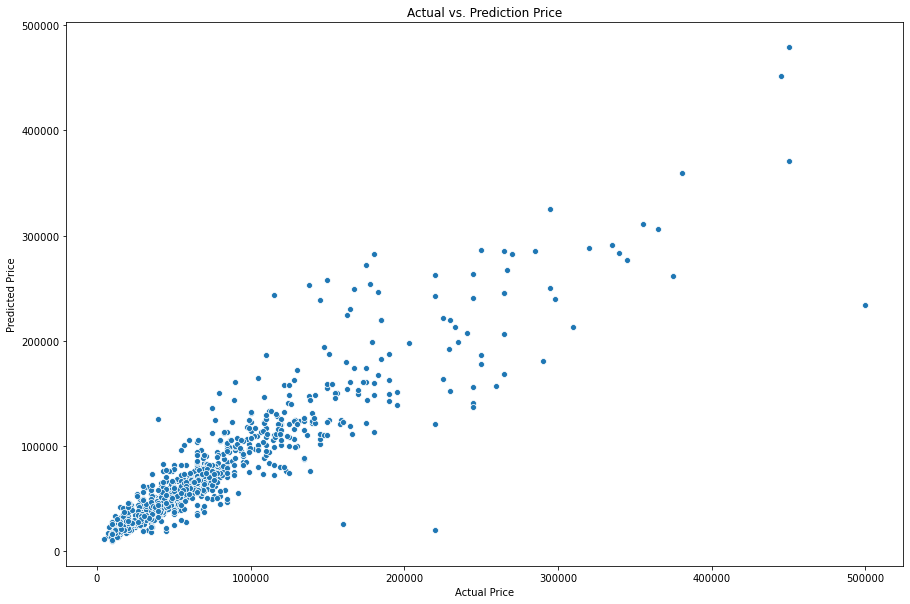

In [672]:
# Actual vs. Prediction Price
plt.figure(figsize=(15, 10))
plot = sns.scatterplot(y_test, preds_rf_test).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

By this Scatter Plot, we can see that our model might be linear to Actual Price (from what we Predicted). But when the Price more than 100000, this plot comes more irregular. We can see that sometime we had a high-predicted price and sometime low after 100000.

**Feature Importances**

Hereby we will see what is the most important feature that influence the price :

In [644]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
perm_imp_rfpimp.head(5)

,Importance
Feature,
Year,0.8
Engine_Size,0.6
Make_Mercedes,0.2
Options_Full,0.1
Make_Land Rover,0.1


---

## 7. Conclusion

- After we doing the model on our dataset, we can see that `Year` and `Engine_Size` really affect and influence on Used Car Price on Saudi Arabia.
- This model using MSE, RMSE and R-squared (Percentage) as evaluation metrics on each regression. Based on the Percentage we can see that model that we made before hyperparameter tuning (random forest regressor) get 84.29% and get the best model than other. 
- By this model we can predicted that on range 0 - 500000 (based on what we filter on the beginning) and get the best range in under 100000 cause it will be slightly dissorder on the price more than 100000

---

## 8. Recommendation

Things that can be done to develop the model to be more better :

1. Make a transform for categorical variables :
    - `Type` : since Type had so many unique value and not a sequentially number, we will use `Binary Encoder`
    - `Region` : since Region had so many unique value and not a sequentially number, we will use `Binary Encoder`
    - `Make` : since Region had so many unique value and not a sequentially number, we will use `Binary Encoder`
    - `Gear_Type` : since the Gear_Type had a few of unique value, it can be handled by `One Hot Encoder`
    - `Origin` : since the Gear_Type had a few of unique value, it can be handled by `One Hot Encoder`
    - `Options` : since the Gear_Type had a few of unique value, it can be handled by `One Hot Encoder`

this might be boost our model, but things like region & origin might be not so influence the car price 

2. As we know, a car might be influence by color & kind (SUV, Sedan etc) of car  as the preliminary of someone to buy. This  corelative variables definitely could be improving the model prediction.


3. Our model can be be used for other expansion similar models. Such as to made an update listing price used cars from another country. Or to made a review of Used Cars on Saudi Arabia itself. By the review we can see either worth or not worth to buy the used car itself. This review might be improving the model prediction.

---

In [685]:
# Save model
import pickle

# Fit the model on training set
model = RandomForestRegressor()
model.fit(X_train, y_train)

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8422651673586975
